a. Basic Object Detection using OpenCV and Haar Cascades (gc)

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)


Saving RCB.jpg to RCB (1).jpg
Uploaded file: RCB (1).jpg


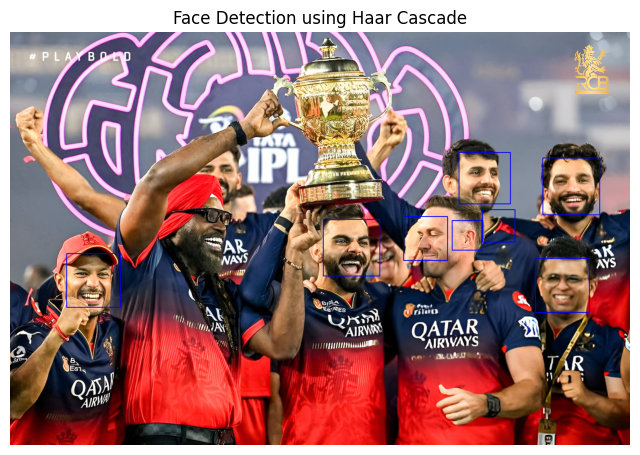

In [ ]:
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread('/content/' + file_name)
if img is None:
    print("❌ Could not load image. Check the path!")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Face Detection using Haar Cascade")
    plt.show()


b. Object Detection with YOLO(google collab)

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving RCB.jpg to RCB (2).jpg
Uploaded file: RCB (2).jpg


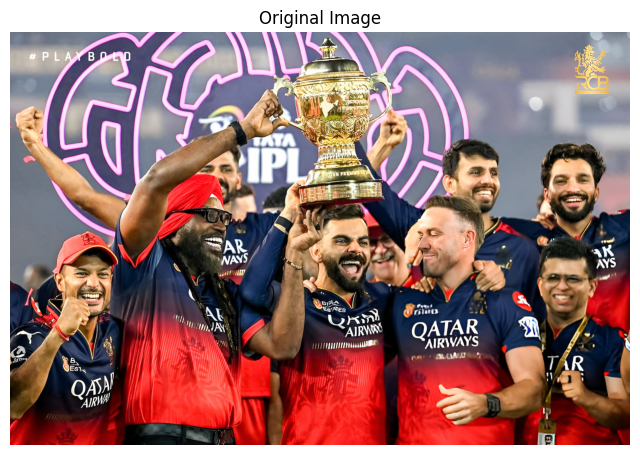


image 1/1 /content/RCB (2).jpg: 448x640 8 persons, 379.1ms
Speed: 3.8ms preprocess, 379.1ms inference, 42.1ms postprocess per image at shape (1, 3, 448, 640)


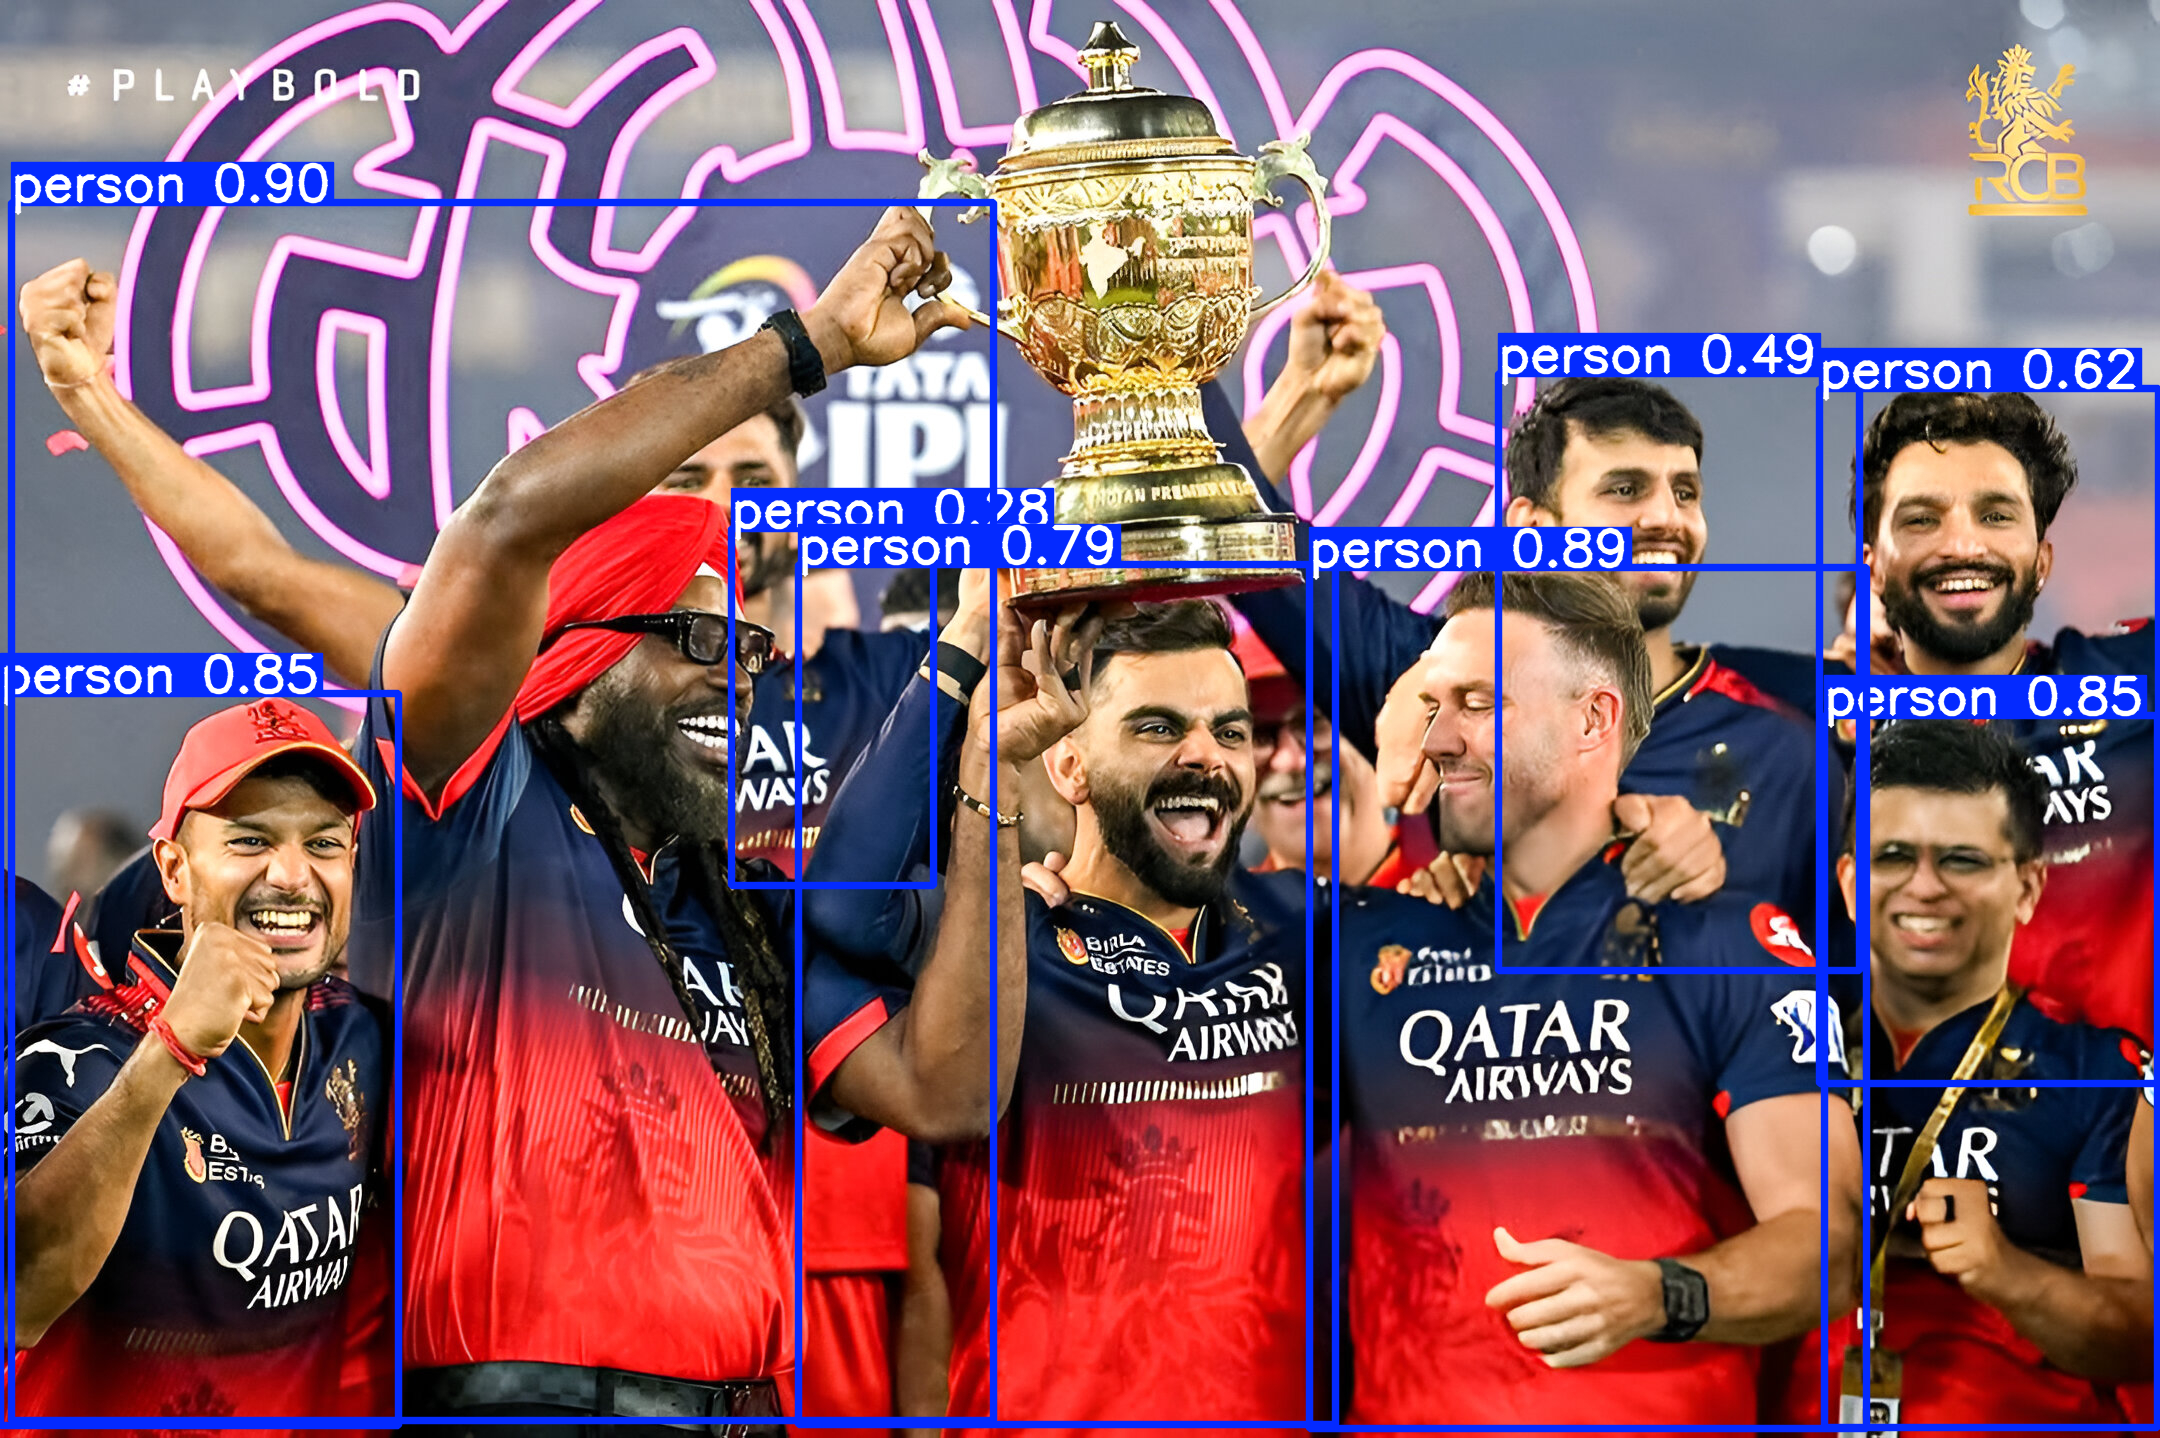

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

model = YOLO('yolov8n.pt')

img_cv = cv2.imread('/content/' + file_name)
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()

results = model('/content/' + file_name)

results[0].show()


--2025-10-13 14:46:14--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182896 (179K) [text/plain]
Saving to: ‘mask_rcnn_inception_v2_coco_2018_01_28.pbtxt’

mask_rcnn_inception 100%[===================>] 178.61K  --.-KB/s    in 0.005s  

2025-10-13 14:46:14 (38.7 MB/s) - ‘mask_rcnn_inception_v2_coco_2018_01_28.pbtxt’ saved [182896/182896]

✅ Mask R-CNN model loaded successfully!
✅ Loaded 91 classes.
📤 Please upload an image for instance segmentation


Saving RCB.jpg to RCB.jpg
Image loaded: RCB.jpg — Shape: (1438, 2160, 3)


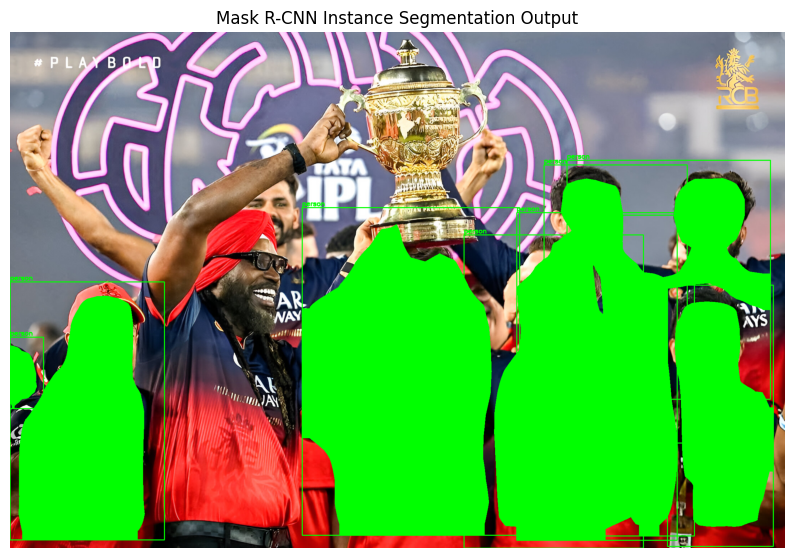

In [2]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import os

if not os.path.exists("mask_rcnn_inception_v2_coco_2018_01_28"):
    !wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
    !tar -xvzf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
if not os.path.exists("mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"):
    !wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt

if not os.path.exists("coco.names"):
    !wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

weights_file = "mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb"
config_file = "mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

net = cv2.dnn.readNetFromTensorflow(weights_file, config_file)
print("✅ Mask R-CNN model loaded successfully!")
with open("coco.names", "r") as f:
    class_names = f.read().strip().split("\n")
print(f"✅ Loaded {len(class_names)} classes.")
print("📤 Please upload an image for instance segmentation")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
height, width, _ = image.shape
print(f"Image loaded: {image_path} — Shape: {image.shape}")
blob = cv2.dnn.blobFromImage(image, swapRB=True)
net.setInput(blob)
boxes, masks = net.forward(["detection_out_final", "detection_masks"])

for i in range(boxes.shape[2]):
    score = boxes[0, 0, i, 2]

    if score > 0.5:
        class_id = int(boxes[0, 0, i, 1])
        x1 = int(boxes[0, 0, i, 3] * width)
        y1 = int(boxes[0, 0, i, 4] * height)
        x2 = int(boxes[0, 0, i, 5] * width)
        y2 = int(boxes[0, 0, i, 6] * height)
        color = (0, 255, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        mask = masks[i, class_id]
        mask = cv2.resize(mask, (x2 - x1, y2 - y1))
        mask = (mask > 0.5)
        roi = image[y1:y2, x1:x2]
        roi[mask] = [0, 255, 0]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Mask R-CNN Instance Segmentation Output")
plt.show()
